# Parte IV: Validación y Pruebas

Autor: Christian Torres

```{note}
Antes de ejecutar este notebook, asegúrese de que el kernel de Jupyter (esquina superior izquierda del notebook) se haya configurado para funcionar con el entorno que tienen instalada todas las librerías y dependencias.
```


In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
with open('../model/reg_linear.pkl','rb') as f:
    reg_linear = pickle.load(f)

with open('../model/reg_ensemble.pkl','rb') as f:
    reg_ensemble = pickle.load(f)

with open('../model/reg_nn.pkl','rb') as f:
    reg_nn = pickle.load(f)


In [3]:
def plot_prediction(y1, y2, n_toplot=10**10):
    
    from scipy.stats import gaussian_kde
    from sklearn.metrics import r2_score, mean_squared_error
    
    idxs = np.arange(len(y1))
    np.random.shuffle(idxs)
    
    y_expected = y1.reshape(-1)[idxs[:n_toplot]]
    y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

    xy = np.vstack([y_expected, y_predicted])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]
    
    plt.figure(figsize=(8,8))
    plt.title("Evaluación de model", fontsize=17)
    plt.ylabel('T2 modelado (°C)', fontsize=16)
    plt.xlabel('T2 referencia (°C)', fontsize=16)
    sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
    plt.clim(0,0.4)
    plt.tick_params(labelsize=14)
    plt.colorbar(sc) 
    lineStart = 5
    lineEnd =   30
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-')
    plt.axvline(0.0, ls='-.', c='k')
    plt.axhline(0.0, ls='-.', c='k')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.gca().set_box_aspect(1)
    
    textstr = '\n'.join((
    r'$RMSE=%.2f$' % (mean_squared_error(y_expected, y_predicted), ),
    r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

In [4]:
#df_test = pd.read_csv('../data/df_test.csv', index_col=['Datetime'],parse_dates=['Datetime'])
df_test = pd.read_csv('../data/df_test.csv', index_col=['time'],parse_dates=['time'])

df_test


,t2m,z,tp,g_1000,t_1000,g_500,t_500,g_200,t_200,Temp
time,,,,,,,,,,
2015-01-10 12:00:00,282.05695,37063.72,3.995374e-07,0.007976,297.14480,0.003653,266.65820,0.000018,219.71408,18.293333
2014-12-26 06:00:00,279.29218,37063.72,2.684062e-04,0.008580,296.75946,0.004843,268.07718,0.000014,220.91527,13.121667
2015-03-09 06:00:00,278.99246,37063.72,7.596798e-06,0.008608,296.89178,0.004352,268.85760,0.000073,220.83499,11.436667
2016-02-05 00:00:00,281.10690,37063.72,9.110756e-05,0.008890,297.24130,0.004541,268.61163,0.000100,221.59322,14.201667
2015-01-28 12:00:00,279.35956,37063.72,0.000000e+00,0.007374,297.01758,0.003265,267.19815,0.000053,219.01299,17.973333
...,...,...,...,...,...,...,...,...,...,...
2014-09-28 18:00:00,283.24710,37063.72,6.620055e-04,0.007441,296.72750,0.004486,267.35605,0.000080,218.91309,21.183333
2016-09-16 18:00:00,285.45584,37063.72,1.650779e-04,0.007545,296.52045,0.004253,267.46793,0.000064,219.49736,24.883333
2018-10-14 06:00:00,279.03052,37063.72,4.339358e-04,0.008357,296.93094,0.004452,267.41824,0.000067,218.43906,12.351667


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
#features_to_drop = ['Temp']
features_to_drop = ['Temp', 'z', 'tp']

df_test_X = df_test.drop(features_to_drop, axis=1)
df_test_y = df_test[['Temp']]

X_test, y_test = df_test_X.values, df_test_y.values


In [7]:
scaler = StandardScaler()
scaler.fit(X_test)

X_test_scaled = scaler.transform(X_test)

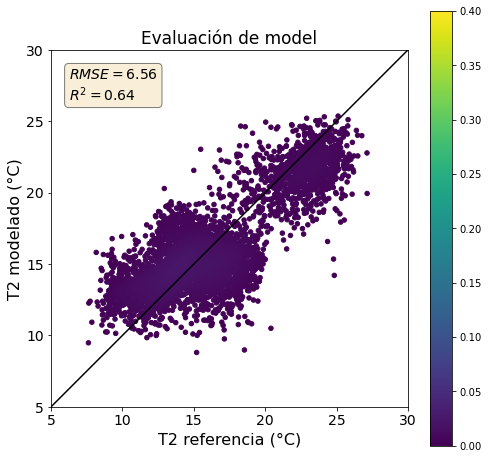

In [8]:
plot_prediction(y_test, reg_linear.predict(X_test_scaled), n_toplot=5000)

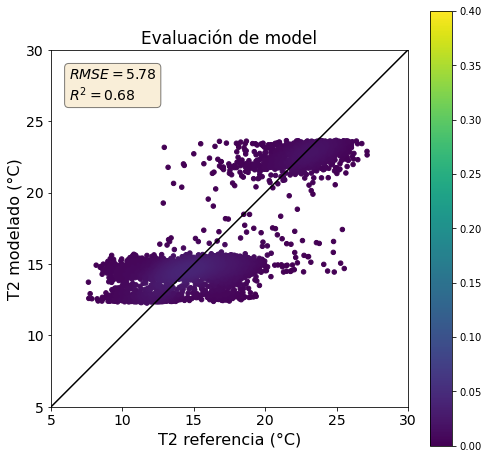

In [9]:
plot_prediction(y_test, reg_ensemble.predict(X_test), n_toplot=5000)

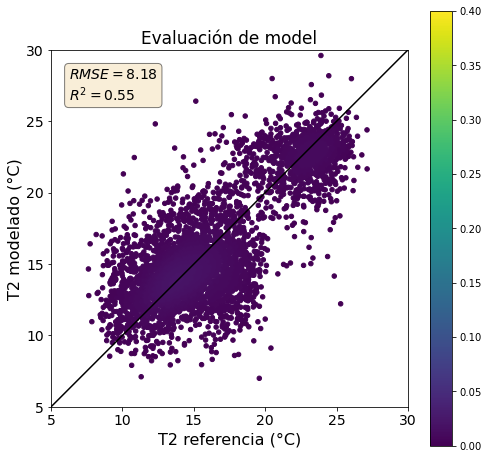

In [10]:
plot_prediction(y_test, reg_nn.predict(X_test_scaled), n_toplot=5000)

In [11]:
#df_train = pd.read_csv('../data/df_train.csv', index_col=['Datetime'],parse_dates=['Datetime'])
df_train = pd.read_csv('../data/df_train.csv', index_col=['time'],parse_dates=['time'])
df_train


,t2m,z,tp,g_1000,t_1000,g_500,t_500,g_200,t_200,Temp
time,,,,,,,,,,
2018-05-19 06:00:00,276.94913,37063.72,0.000000e+00,0.007013,297.03293,0.002849,267.50348,0.000019,218.38457,10.100000
2015-07-06 18:00:00,286.59800,37063.72,0.000000e+00,0.005556,296.67410,0.001022,266.26382,0.000019,220.70213,22.216667
2018-06-15 00:00:00,281.25018,37063.72,9.452924e-07,0.007822,296.93094,0.002658,268.74265,0.000042,220.21470,13.100000
2018-04-15 00:00:00,280.34528,37063.72,4.726928e-06,0.008168,297.30115,0.003085,268.80832,0.000024,219.34155,13.746667
2018-06-19 18:00:00,285.28840,37063.72,7.823156e-05,0.005168,296.69482,0.003095,265.67892,0.000018,219.69220,23.983333
...,...,...,...,...,...,...,...,...,...,...
2016-10-10 00:00:00,280.47000,37063.72,3.284495e-05,0.008805,297.17175,0.003952,268.86847,0.000078,220.62971,14.460000
2016-10-24 06:00:00,278.48785,37063.72,1.005326e-04,0.008125,296.84540,0.003899,267.23240,0.000073,219.37958,9.618333
2018-03-24 12:00:00,276.97980,37063.72,0.000000e+00,0.007569,297.15585,0.003849,267.99660,0.000067,218.86237,15.501667


In [12]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [13]:
# Hiperparametros
param_grid = {'n_estimators': [20, 50, 100, 200],
                'max_features': [2, 3, 4, 8, 12],
                'max_depth': [4, 8,], 
                'min_samples_leaf': [5, 10, 20, 40],
                },

forest_reg = GradientBoostingRegressor()

grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=5, 
                            scoring='neg_mean_squared_error',
                            return_train_score=True, n_iter=10)


In [14]:
df_train.columns

Index(['t2m', 'z', 'tp', 'g_1000', 't_1000', 'g_500', 't_500', 'g_200',
       't_200', 'Temp'],
      dtype='object')

In [15]:
#features_to_drop = ['Temp']
#features_to_drop = ['Temp', 'z', 'tp']
features_to_drop = ['g_1000', 'g_200', 't_1000', 't_1000']

df_train_X = df_train.drop(features_to_drop, axis=1)
df_train_y = df_train[['Temp']]

X_train, y_train = df_train_X.values, df_train_y.values

In [16]:
grid_search.fit(X_train, y_train)

/home/christian/miniconda3/envs/DL_SMB/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/christian/miniconda3/envs/DL_SMB/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/christian/miniconda3/envs/DL_SMB/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/christian/miniconda3/envs/DL_SMB/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was 

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions=({'max_depth': [4, 8],
                                         'max_features': [2, 3, 4, 8, 12],
                                         'min_samples_leaf': [5, 10, 20, 40],
                                         'n_estimators': [20, 50, 100, 200]},),
                   return_train_score=True, scoring='neg_mean_squared_error')

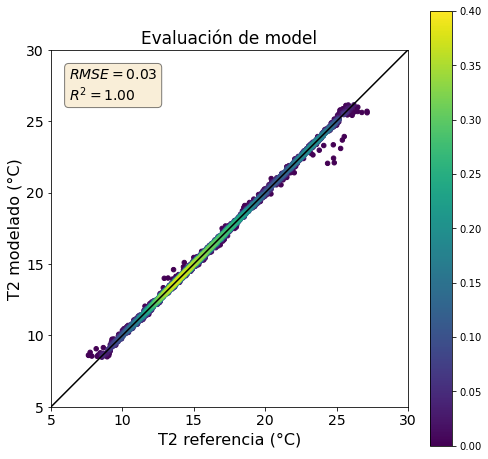

In [17]:
df_test_X = df_test.drop(features_to_drop, axis=1)

plot_prediction(y_test, grid_search.predict(df_test_X.values), n_toplot=5000)